In [1]:
import numpy as ny
import pandas as ps
import matplotlib.pyplot as ml
import seaborn as sb
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA,ARMA

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
DF= ps.read_csv(r"C:\Users\ShinChan\Downloads\international-airline-passengers.csv",names=["year","pass co"])

In [4]:
DF.head()

,year,pass co
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
DF.describe(include='O')

,year
count,144
unique,144
top,1949-05
freq,1


In [6]:
DF.describe()

,pass co
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
DF.shape


(144, 2)

In [8]:
DF['format']=ps.to_datetime(DF["year"],format='%Y-%m')

In [9]:
DF.tail(2)

,year,pass co,format
142,1960-11,390,1960-11-01
143,1960-12,432,1960-12-01


In [10]:
DF.isna().sum()

year       0
pass co    0
format     0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1152x288 with 0 Axes>

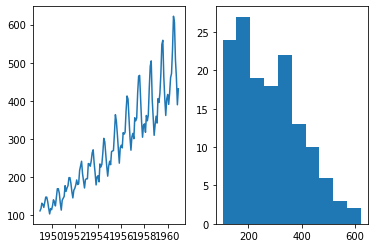

In [11]:
ml.figure(figsize=(16,4))
fig,(ax1,ax2)=ml.subplots(1,2)
ax2.hist(DF['pass co'])
ax1.plot(DF['format'],DF['pass co'])
ml.show()

In [12]:
DF['month']=DF.format.apply(lambda a : a.month)
y=DF.set_index('format')

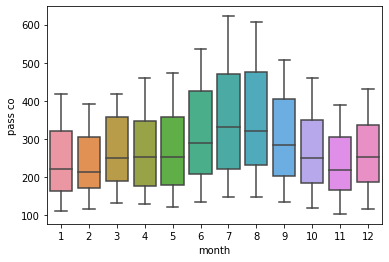

In [13]:
sb.boxplot(DF['month'],DF['pass co'])

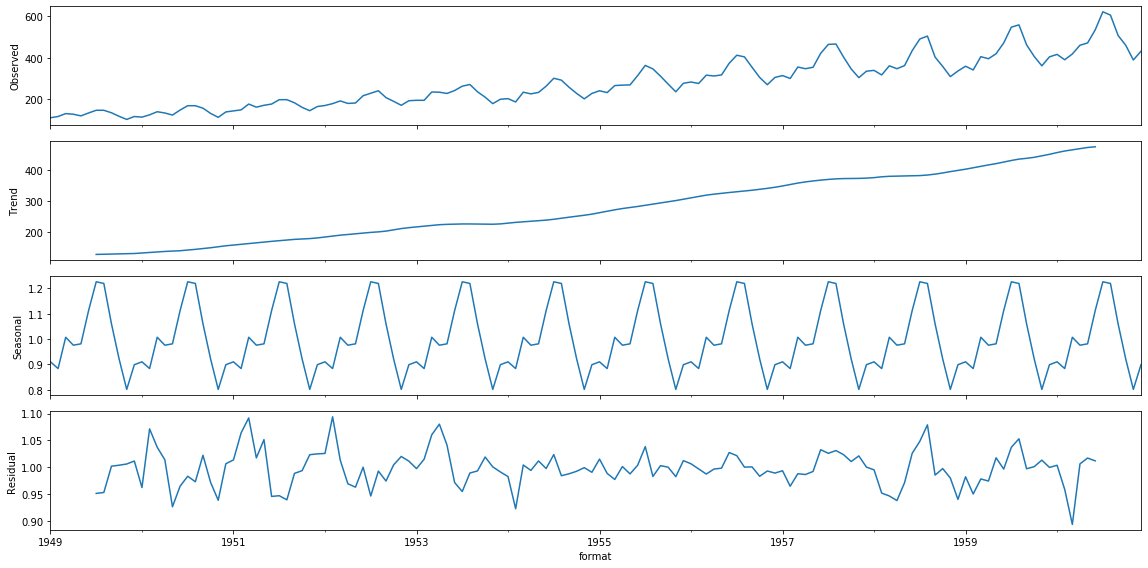

In [14]:
from pylab import rcParams
rcParams['figure.figsize']=16,8
decomposition = sm.tsa.seasonal_decompose(y["pass co"],model="multiplicative")
decomposition.plot()
ml.show()

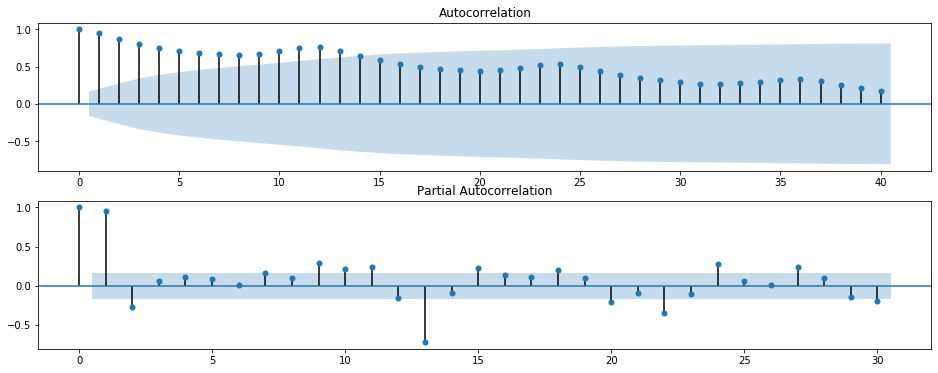

In [15]:
from pylab import rcParams
rcParams['figure.figsize']=16,6
ml.figure()
ml.subplot(211)
plot_acf(y['pass co'],ml.gca(),lags=40)
ml.subplot(212)
plot_pacf(y['pass co'],ml.gca(),lags=30)
ml.show()

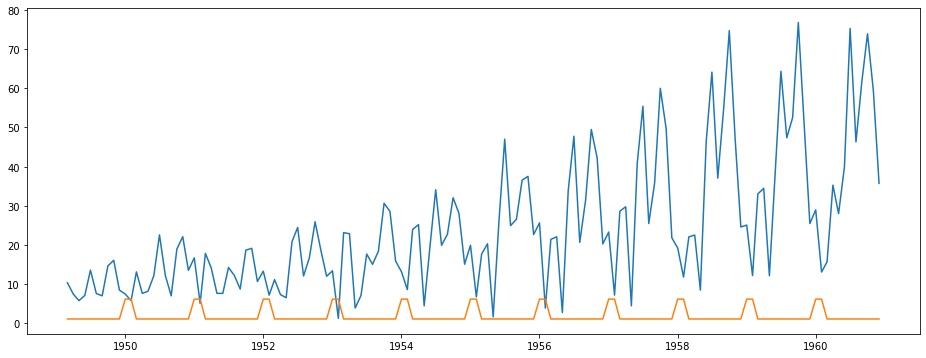

In [16]:
rm=ps.DataFrame.rolling(y,3).mean()
rs=rm=ps.DataFrame.rolling(y,3).std()
ml.plot(rm)

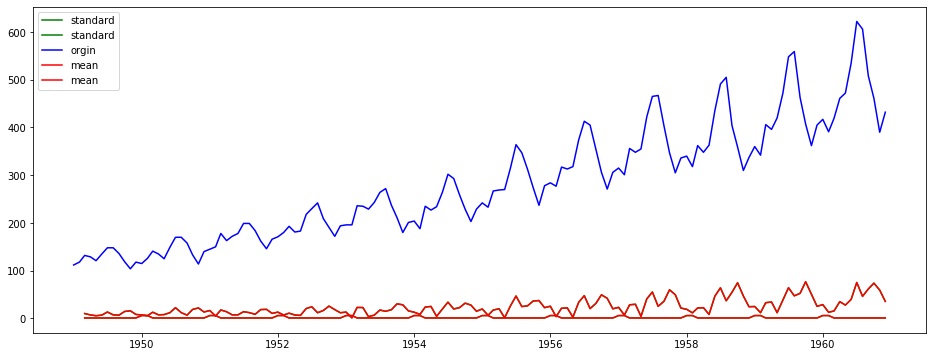

In [17]:
st=ml.plot(rs,label="standard",color='g')
orgg=ml.plot(y['pass co'],label="orgin",color='blue')
mea=ml.plot(rm,label="mean",color='red')

ml.legend(loc='best')
ml.show(block=False)

In [18]:
adfuller(y['pass co'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

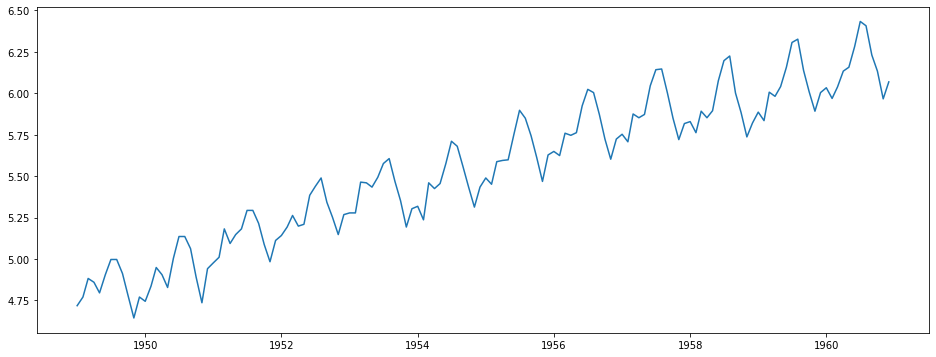

In [19]:
lo=ny.log(y['pass co'])
ml.plot(lo)

### Moving Average Smoothing Method

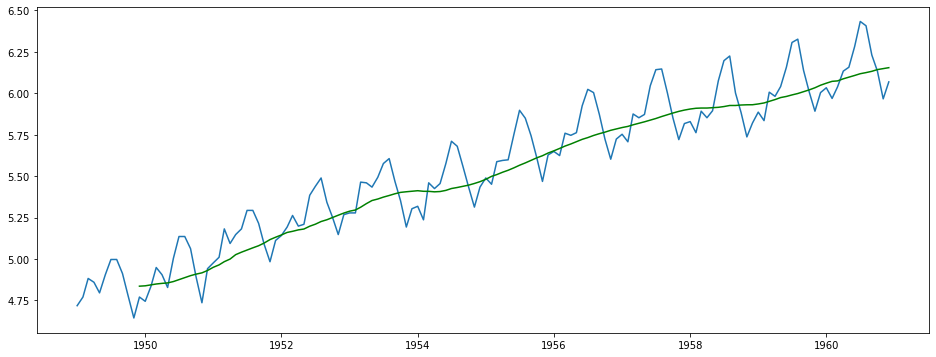

In [20]:

ma=ps.DataFrame.rolling(lo,12).mean()
ml.plot(lo)
ml.plot(ma,color='g')


In [21]:
dif=lo-ma

In [22]:
dif.dropna(inplace=True)

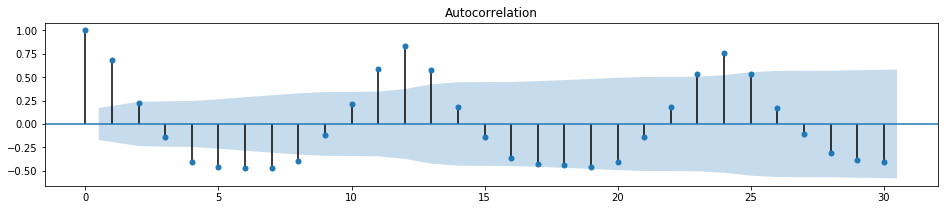

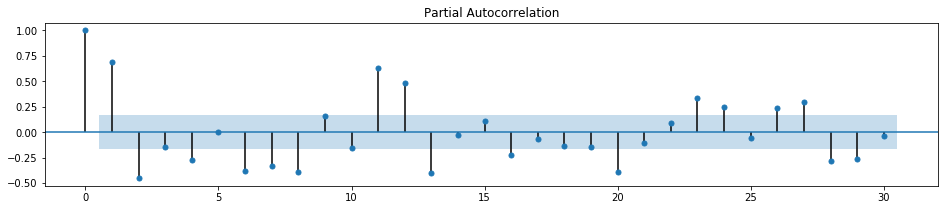

In [23]:
from pylab import rcParams
rcParams['figure.figsize']=(16,3)
plot_acf(dif,lags=30)
plot_pacf(dif,lags=30)
ml.show()

In [24]:
rom=ps.DataFrame.rolling(window=12,self=dif).mean()
ros=ps.DataFrame.rolling(window=12,self=dif).std()


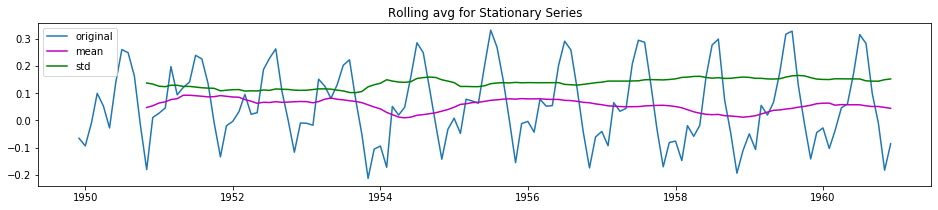

In [25]:
ml.title('Rolling avg for Stationary Series')
ml.plot(dif,label='original')
ml.plot(rom,label='mean',color='m')
ml.plot(ros,label='std',color='g')
ml.legend()
ml.show(block=False)

In [26]:
adfuller(dif)

(-3.162907991300858,
 0.022234630001243844,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747125)

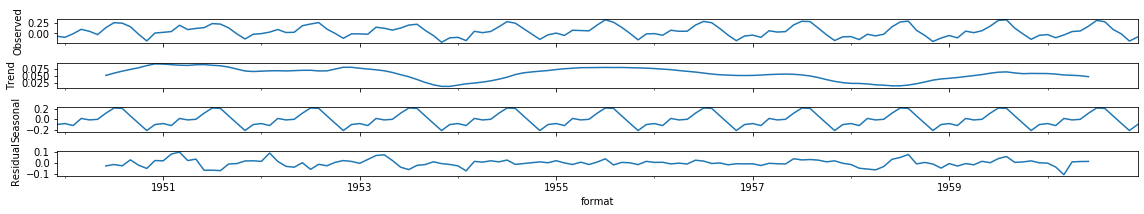

In [27]:
sm.tsa.seasonal_decompose(dif).plot()
ml.show()

### Exponetial Weighted Moving Average

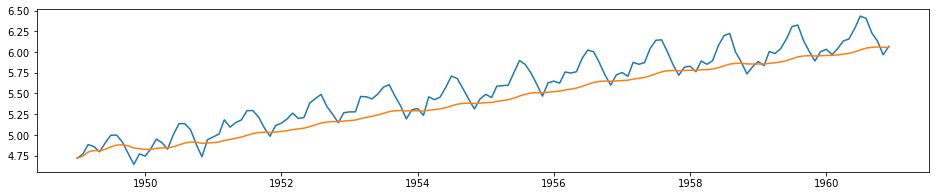

In [28]:
ewm=ps.DataFrame.ewm(lo,halflife=12).mean()
ml.plot(lo)
ml.plot(ewm)
ml.show()

In [29]:
adfuller(ewm)

(-2.148247655427139,
 0.22556144722800753,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 -1160.4517540089778)

### Differencing Method

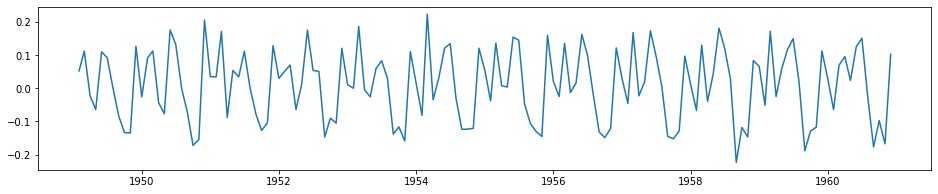

In [30]:
diff=lo-lo.shift()
ml.plot(diff)

In [31]:
diff.dropna(inplace=True)

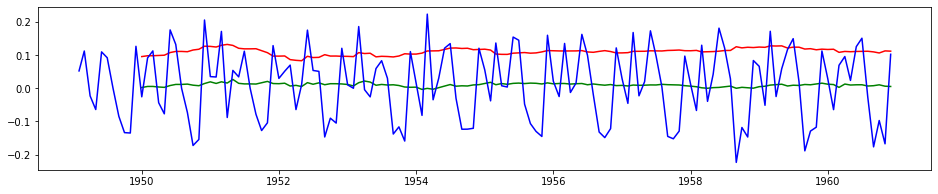

In [32]:
ml.plot(ps.DataFrame.rolling(diff,12).mean(),label='mean',color='g')
ml.plot(ps.DataFrame.rolling(diff,12).std(),label='std',color='r')
ml.plot(diff,label='ori',color='b')

### AR Model

In [33]:
ar=AR(diff).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS:0.194484')

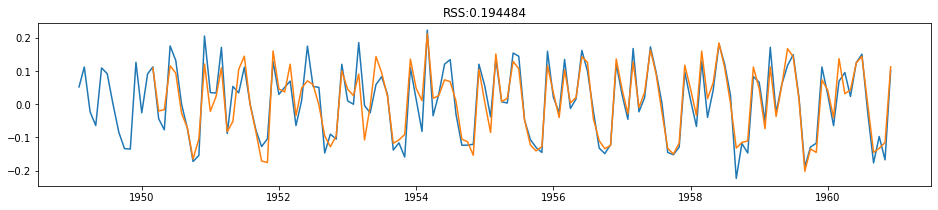

In [34]:
ml.plot(diff)
ml.plot(ar.fittedvalues)
ml.title('RSS:%f'% ny.nansum((diff-ar.fittedvalues)**2))

In [35]:
cu_diff=ny.cumsum(ar.fittedvalues)
adf=cu_diff.add(ps.Series(lo.iloc[0],index=lo.index),fill_value=0)

In [36]:
ret=ny.exp(adf)

Text(0.5, 1.0, 'RMSE:0')

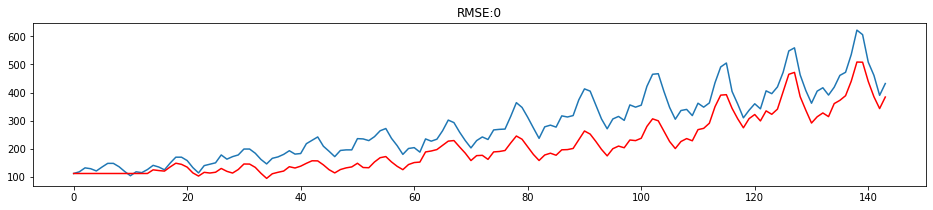

In [37]:
ml.plot(DF['pass co'])
ml.plot(ret.values,color='r')
ml.title('RMSE:%i'% ny.sqrt(ny.nansum(((ret-DF['pass co'])**2)/len(DF['pass co']))))

In [38]:
from sklearn.metrics import r2_score,roc_auc_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error    

In [39]:
r2_score(DF['pass co'],ret)

0.5686734896130738

In [40]:
mean_absolute_error(DF['pass co'],ret)

69.42862838872753

In [41]:
mean_squared_error(DF['pass co'],ret)

6164.506983577638

In [42]:
median_absolute_error(DF['pass co'],ret)

69.36695435384787

In [43]:
mean_squared_log_error(DF['pass co'],ret)

0.09945599448249762

### MA Model

In [44]:
arma=ARMA(diff,order=(0,1)).fit(disp=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [45]:
ar=ny.cumsum(arma.fittedvalues)

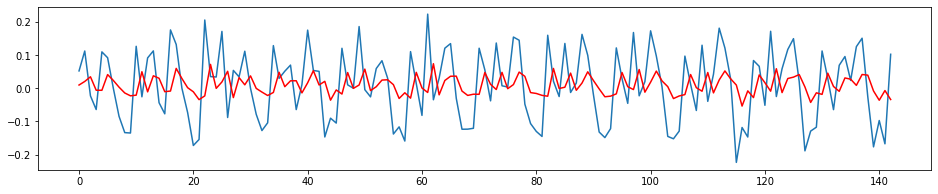

In [46]:
ml.plot(diff.values)
ml.plot(arma.fittedvalues.values,color='r')

In [47]:
mean_absolute_error(diff,arma.fittedvalues)

0.08900823731875472

In [48]:
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                pass co   No. Observations:                  143
Model:                     ARMA(0, 1)   Log Likelihood                 121.754
Method:                       css-mle   S.D. of innovations              0.103
Date:                Sun, 21 Jun 2020   AIC                           -237.507
Time:                        22:50:04   BIC                           -228.619
Sample:                    02-01-1949   HQIC                          -233.895
                         - 12-01-1960                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0097      0.011      0.887      0.377      -0.012       0.031
ma.L1.pass co     0.2722      0.095      2.873      0.005       0.086       0.458
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.6744           +0.0000j            3.6744            0.5000
-----------------------------------------------------------------------------
"""

In [49]:
ny.nansum((diff-arma.fittedvalues)**2)

1.524538157617147

In [50]:
r2_score(diff,arma.fittedvalues)

0.05443163615901814

## Interpreting ACF plots


ACF Shape	| Indicated Model |
-- | -- |
Exponential, decaying to zero |	Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model |
Alternating positive and negative, decaying to zero	Autoregressive model. |  Use the partial autocorrelation plot to help identify the order. |
One or more spikes, rest are essentially zero | Moving average model, order identified by where plot becomes zero. |
Decay, starting after a few lags |	Mixed autoregressive and moving average (ARMA) model. | 
All zero or close to zero | Data are essentially random. |
High values at fixed intervals | Include seasonal autoregressive term. |
No decay to zero |	Series is not stationary |

### ARMA Model

In [51]:
armaa=ARMA(diff,order=(2,1)).fit(disp=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [52]:
ar1=ny.cumsum(armaa.fittedvalues)

In [53]:
ar2=ar1.add(ps.Series(lo.iloc[0],index=lo.index),fill_value=0)

In [54]:
arex=ny.exp(ar2)
arex

format
1949-01-01    112.000000
1949-02-01    113.134329
1949-03-01    115.274737
1949-04-01    118.258778
1949-05-01    115.151377
                 ...    
1960-08-01    223.463243
1960-09-01    206.310689
1960-10-01    193.276258
1960-11-01    195.570819
1960-12-01    206.666470
Length: 144, dtype: float64

In [55]:
r2_score(lo,arex)

-78663.691822251

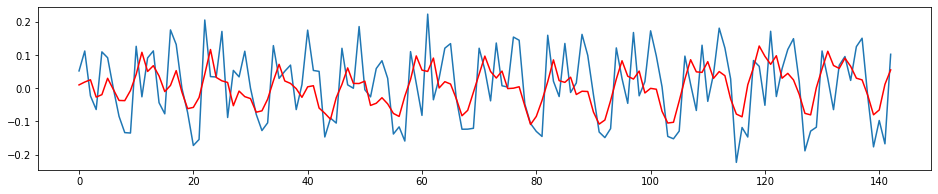

In [56]:
ml.plot(diff.values)
ml.plot(armaa.fittedvalues.values,color='r')

### ARIMA Model

In [57]:
ts=DF['pass co']-DF['pass co'].shift()

In [58]:
ts.dropna(inplace=True)

In [59]:
train=DF['pass co'][:int((0.75)*len(DF['pass co']))]
test=DF['pass co'][int((0.75)*len(DF['pass co'])):]

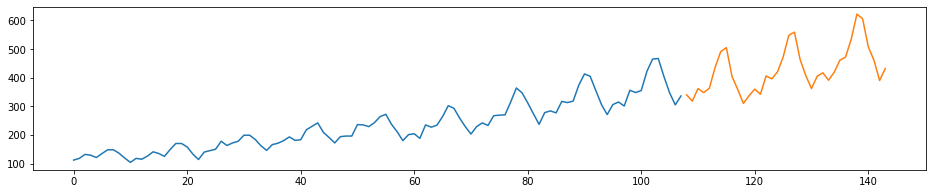

In [60]:
ml.plot(train)
ml.plot(test)

In [61]:
train1=diff[:int((0.75)*len(diff))]
test1=diff[int((0.75)*len(diff)):]

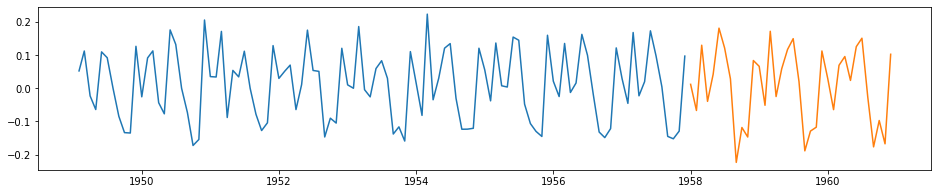

In [62]:
ml.plot(train1)
ml.plot(test1)

In [63]:
addi=ny.cumsum(diff).add(ps.Series(lo[0],index=lo.index),fill_value=0)

In [64]:
aa=ny.exp(addi)

In [65]:
train2=aa[:int((0.75)*len(aa))]
test2=aa[int((0.75)*len(aa)):]

In [66]:
arima=ARIMA(train2,order=(1,1,1)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [67]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -493.230
Method:                       css-mle   S.D. of innovations             23.986
Date:                Sun, 21 Jun 2020   AIC                            994.461
Time:                        22:50:07   BIC                           1005.152
Sample:                    02-01-1949   HQIC                           998.795
                         - 12-01-1957                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4356      0.265      9.186      0.000       1.916       2.955
ar.L1.D.y      0.7409      0.067     10.991      0.000       0.609       0.873
ma.L1.D.y     -1.0000      0.025    -39.435      0.000      -1.050      -0.950
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3496           +0.0000j            1.3496            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [68]:
start=test1.index.min()
end=test1.index.max()
end

Timestamp('1960-12-01 00:00:00')

In [69]:
pre=arima.predict(start,end)

In [70]:
r2_score(test2,pre)

-29.59108148851316

In [71]:
mean_squared_error(test2,pre)

187165.5838216227

### SARIMA

In [72]:
sa=SARIMAX(train2,order=(1,1,2),seasonal_order=(1,1,2,12)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [73]:
pre=sa.predict(start,end)

In [74]:
r2_score(test2,pre)

0.9310282111057655

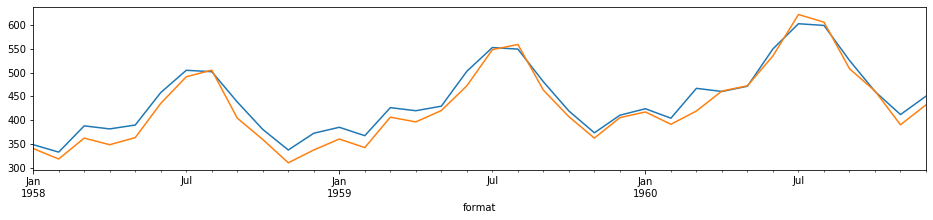

In [75]:
pre.plot()
test2.plot()

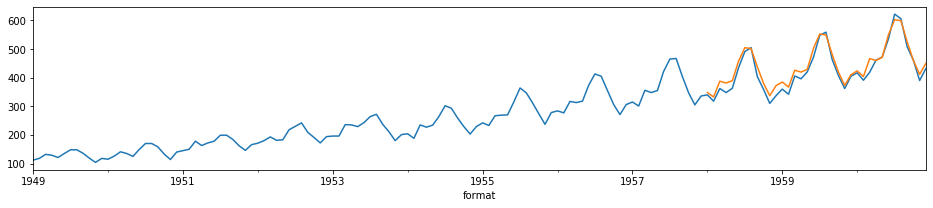

In [76]:
aa.plot()
pre.plot()

In [77]:
sa.predict('1957-01-01 00:00:00',end=None)

1957-01-01    315.982967
1957-02-01    303.958885
1957-03-01    345.622521
1957-04-01    350.142836
1957-05-01    355.669768
1957-06-01    410.257796
1957-07-01    464.423253
1957-08-01    454.111143
1957-09-01    412.407564
1957-10-01    359.448857
1957-11-01    311.110031
1957-12-01    345.117911
Freq: MS, dtype: float64

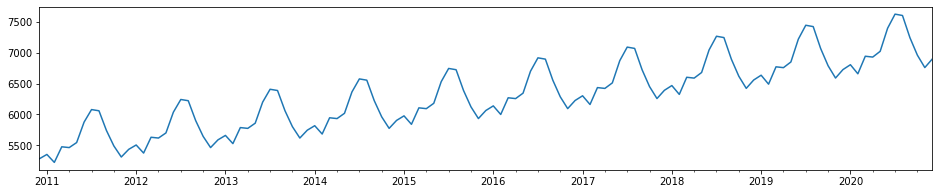

In [78]:
sa.predict('2010-12-01 00:00:00','2020-12-01 00:00:00').plot()

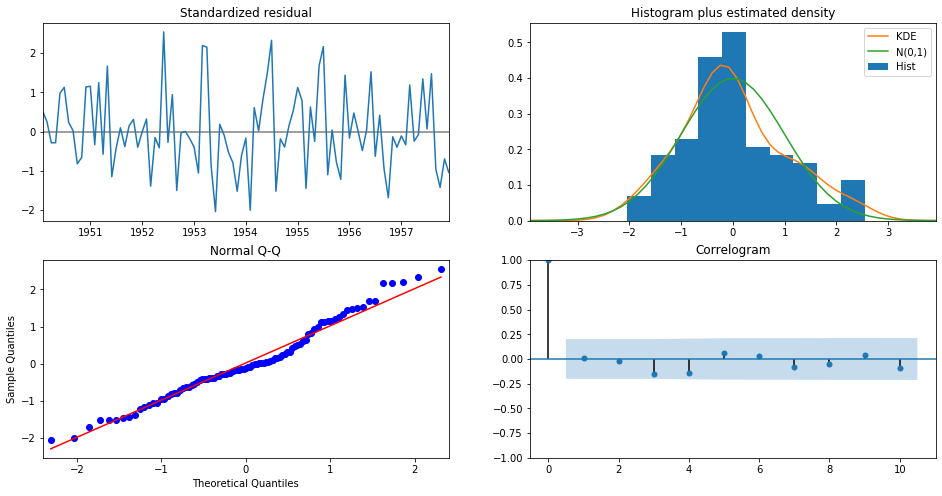

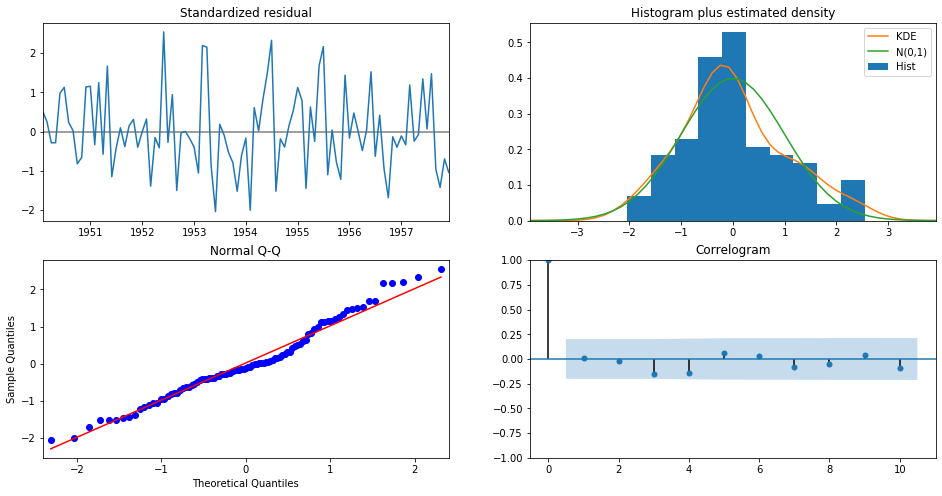

In [84]:
sa.plot_diagnostics(figsize=(16,8))

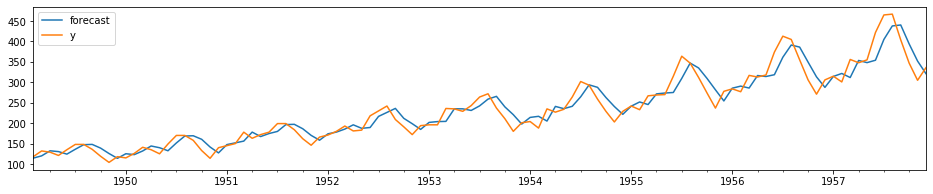

In [82]:
arima.plot_predict()
ml.show()